In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("miniPNW_metadata.csv")

In [4]:
df.head()

,Unnamed: 0,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_type,source_depth_km,preferred_source_magnitude,preferred_source_magnitude_type,preferred_source_magnitude_uncertainty,...,trace_S_onset,trace_P_onset,trace_snr_db,year,source_type_pnsn_label,source_local_magnitude,source_local_magnitude_uncertainty,source_duration_magnitude,source_duration_magnitude_uncertainty,source_hand_magnitude
0,0,uw61669232,2020-09-07T03:44:14.690000Z,46.560,-119.797,earthquake,23.300,1.30,ml,0.241000,...,impulsive,impulsive,-1.444|2.612|9.921,2020.0,eq,1.30,0.241273,1.17,0.187840,NaN
1,1,uw60888282,2014-10-08T15:39:31.330000Z,45.371,-121.708,earthquake,-0.947,1.67,ml,0.128000,...,impulsive,impulsive,0.368|3.526|5.981,2014.0,eq,1.67,0.128000,1.63,0.099000,NaN
2,2,uw61361706,2017-12-30T04:37:46.870000Z,46.165,-120.543,earthquake,13.520,2.46,ml,0.158000,...,impulsive,emergent,11.274|13.32|15.828,2017.0,eq,2.46,0.158000,3.37,0.389000,NaN
3,3,uw61639436,2020-06-09T23:37:10.420000Z,46.542,-119.589,earthquake,16.370,1.59,ml,0.157000,...,impulsive,emergent,27.007|20.797|19.252,2020.0,eq,1.59,0.156750,1.69,0.354773,NaN
4,4,uw61735446,2021-05-24T10:42:37.810000Z,46.857,-121.941,earthquake,12.380,0.83,ml,0.082983,...,impulsive,emergent,18.579|18.912|7.609,2021.0,eq,0.83,0.082983,0.50,0.381880,NaN


In [5]:
sources = df['source_type'].unique()
print(sources)

['earthquake' 'explosion' 'sonic_boom' 'thunder' 'surface_event']


In [13]:
df.drop(df[df['source_type'] != 'earthquake'].index, inplace=True)

In [14]:
sources = df['source_type'].unique()
print(sources)

['earthquake']


In [42]:
years = df['year'].unique()
print(years)

[2020. 2014. 2017. 2021. 2022. 2019. 2009. 2015. 2011. 2005. 2012. 2013.
 2018. 2007. 2004. 2003. 2010. 2006. 2008. 2016. 2002.]


In [52]:
max_magnitudes = df.groupby('year')['preferred_source_magnitude'].max()
print(max_magnitudes)

year
2002.0    2.80
2003.0    2.70
2004.0    3.00
2005.0    2.10
2006.0    4.50
2007.0    1.90
2008.0    2.30
2009.0    3.24
2010.0    3.76
2011.0    3.22
2012.0    2.41
2013.0    2.65
2014.0    2.87
2015.0    3.72
2016.0    3.30
2017.0    2.46
2018.0    2.95
2019.0    2.33
2020.0    4.50
2021.0    2.84
2022.0    2.77
Name: preferred_source_magnitude, dtype: float64


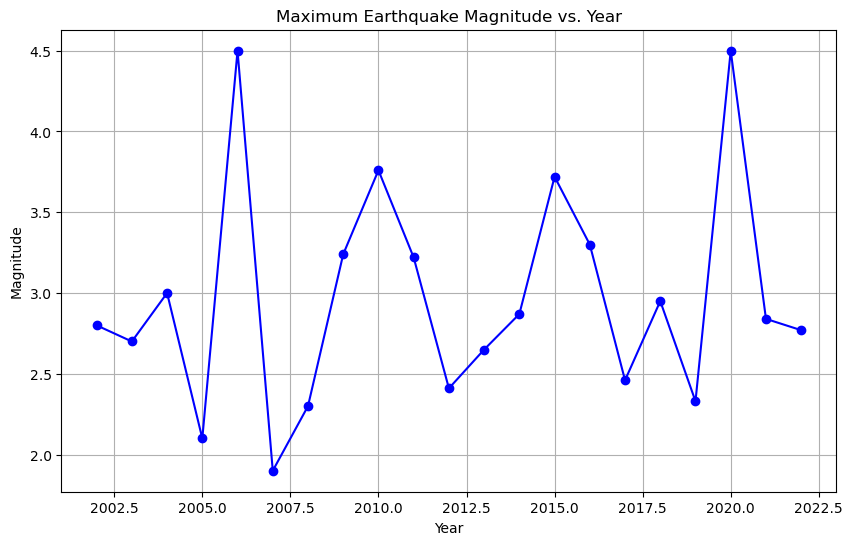

In [55]:
max_magnitudes = max_magnitudes.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(max_magnitudes['year'], max_magnitudes['preferred_source_magnitude'], marker='o', linestyle='-', color='b')
plt.title('Maximum Earthquake Magnitude vs. Year')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [57]:
plt.savefig('earthquake_max_magnitude.png')

<Figure size 640x480 with 0 Axes>